**Seeding for reproducibility**

In [1]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

**Data Curation**

Upload the kaggle.json file

In [3]:
%pip install kaggle

In [4]:
kaggle_credentails = json.load(open("kaggle.json"))

In [5]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallahalidev/plantvillage-dataset")

print("Path to dataset files:", path)

c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\asus\.cache\kagglehub\datasets\abdallahalidev\plantvillage-dataset\versions\3


In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

^C


Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

KeyboardInterrupt: 

In [10]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil

print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'grayscale', 'segmented']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


**Number of Classes = 38**

In [11]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['00e00912-bf75-4cf8-8b7d-ad64b73bea5f___Mt.N.V_HL 6067.JPG', '0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt.N.V_HL 6103.JPG', '0294ca65-4c29-44be-af28-501df9f715e8___Mt.N.V_HL 6176.JPG', '02f95acb-5d92-4f2a-b7ec-3af8709ee7c9___Mt.N.V_HL 9078.JPG', '03027791-26bb-4c46-960e-8df76e27042c___Mt.N.V_HL 6070.JPG']


**Data Preprocessing**

In [12]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

In [2]:
image_path = r'test_images\00e909aa-e3ae-4558-9961-336bb0f35db3___JR_FrgE.S 8593.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

NameError: name 'mpimg' is not defined

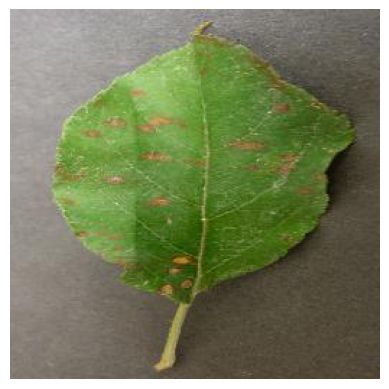

In [14]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Use your Windows path, note the double backslash \\ or forward slash /
image_path = 'C:/Users/asus/Desktop/Plant Disease Classification/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read and display the image
img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('off')
plt.show()


In [15]:
# Image Parameters
img_size = 224
batch_size = 32

**Train Test Split**

In [16]:
# Image Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,      # Rotate images up to 30 degrees
    width_shift_range=0.2,  # Shift width by 20%
    height_shift_range=0.2, # Shift height by 20%
    shear_range=0.2,        # Shear transformation
    zoom_range=0.2,         # Zoom in or out by 20%
    horizontal_flip=True,   # Flip images horizontally
    fill_mode='nearest',     # Fill missing pixels after transformation


    validation_split=0.2  # Use 20% of data for validation
)


In [17]:
# No Augmentation for Validation (Only Rescaling)
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [18]:
# Train Generator
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),#see if needed to replace with actual size
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)


Found 43456 images belonging to 38 classes.


In [19]:
# Validation Generator
#Validation Generator (Only Rescaled Data, No Augmentation)
validation_generator = val_datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)
# Check the class indices
print("Class Indices:", train_generator.class_indices)


Found 10849 images belonging to 38 classes.
Class Indices: {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Toma

**Convolutional Neural Network**

In [20]:
# Model Definition
model = models.Sequential()


model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))




model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [21]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

In [22]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Model training**

In [23]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=30,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/30
1358/1358 [==============================] - 383s 276ms/step - loss: 1.6373 - accuracy: 0.5451 - val_loss: 1.1752 - val_accuracy: 0.6552
Epoch 2/30
1358/1358 [==============================] - 1500s 1s/step - loss: 0.8388 - accuracy: 0.7399 - val_loss: 0.6307 - val_accuracy: 0.8056
Epoch 3/30
1358/1358 [==============================] - 328s 242ms/step - loss: 0.6409 - accuracy: 0.7977 - val_loss: 0.5922 - val_accuracy: 0.8179
Epoch 4/30
1358/1358 [==============================] - 309s 227ms/step - loss: 0.5534 - accuracy: 0.8254 - val_loss: 0.6999 - val_accuracy: 0.8016
Epoch 5/30
1358/1358 [==============================] - 283s 208ms/step - loss: 0.4810 - accuracy: 0.8440 - val_loss: 0.5538 - val_accuracy: 0.8364
Epoch 6/30
1358/1358 [==============================] - 280s 206ms/step - loss: 0.4419 - accuracy: 0.8572 - val_loss: 0.6268 - val_accuracy: 0.8191
Epoch 7/30
1358/1358 [==============================] - 279s 206ms/step - loss: 0.3983 - accuracy: 0.8718 - val_lo

**Model Evaluation**

In [24]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 [==============================] - 13s 39ms/step - loss: 0.3208 - accuracy: 0.9093
Validation Accuracy: 90.93%


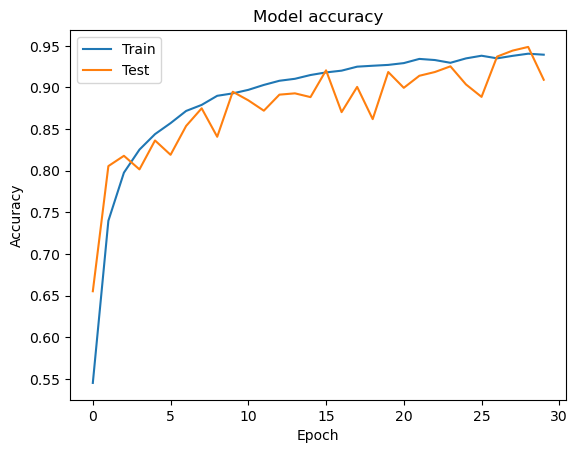

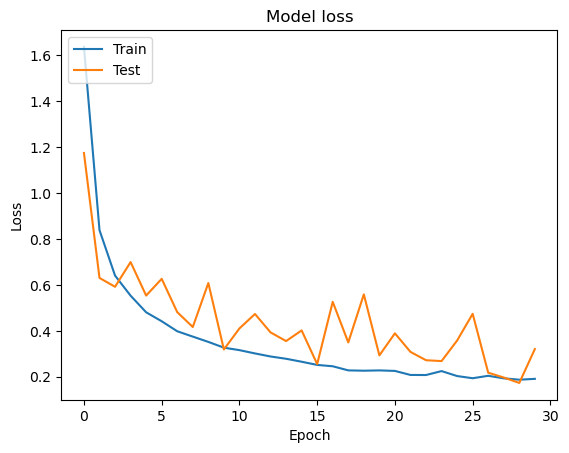

In [25]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

340/340 [==============================] - 13s 39ms/step
True labels length: 10849
Predicted labels length: 10849


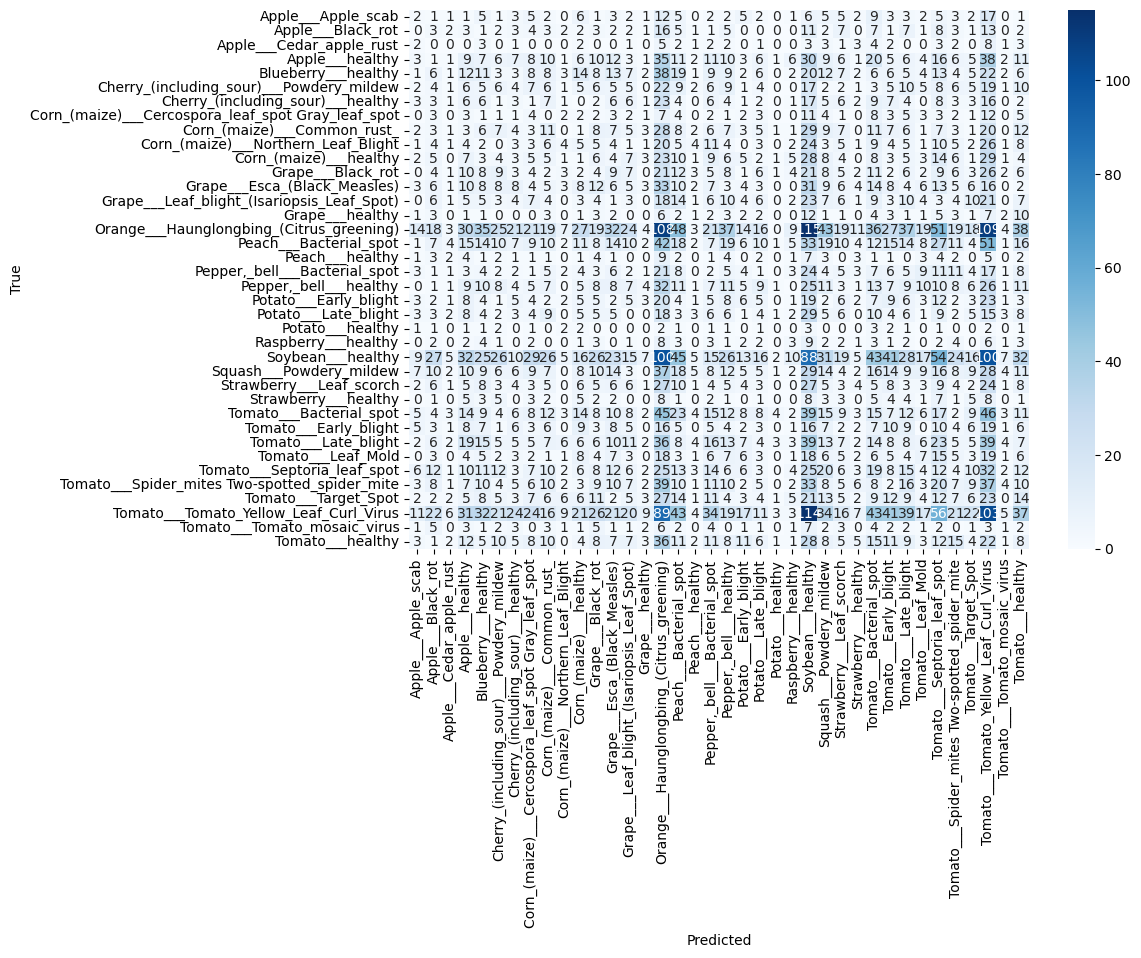

Classification Report for CNN Model:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.02      0.02      0.02       126
                                 Apple___Black_rot       0.01      0.02      0.02       124
                          Apple___Cedar_apple_rust       0.00      0.00      0.00        55
                                   Apple___healthy       0.03      0.03      0.03       329
                               Blueberry___healthy       0.04      0.04      0.04       300
          Cherry_(including_sour)___Powdery_mildew       0.03      0.03      0.03       210
                 Cherry_(including_sour)___healthy       0.02      0.02      0.02       170
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.02      0.04      0.02       102
                       Corn_(maize)___Common_rust_       0.04      0.05      0.05       238
               Corn_(maize)___Northern_Lea

In [28]:
###SSSSELF

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Predict for all validation data
validation_steps = np.ceil(validation_generator.samples / batch_size)

# Make predictions
validation_predictions = model.predict(validation_generator, steps=int(validation_steps))

# Get true labels
true_labels = validation_generator.classes  # True labels

# Get predicted labels
predicted_labels = np.argmax(validation_predictions, axis=1)

# Now they will match
print(f"True labels length: {len(true_labels)}")
print(f"Predicted labels length: {len(predicted_labels)}")

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plotting
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=validation_generator.class_indices.keys(),
            yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print the classification report
class_report = classification_report(true_labels, predicted_labels, target_names=validation_generator.class_indices.keys())
print("Classification Report for CNN Model:")
print(class_report)

340/340 [==============================] - 14s 40ms/step


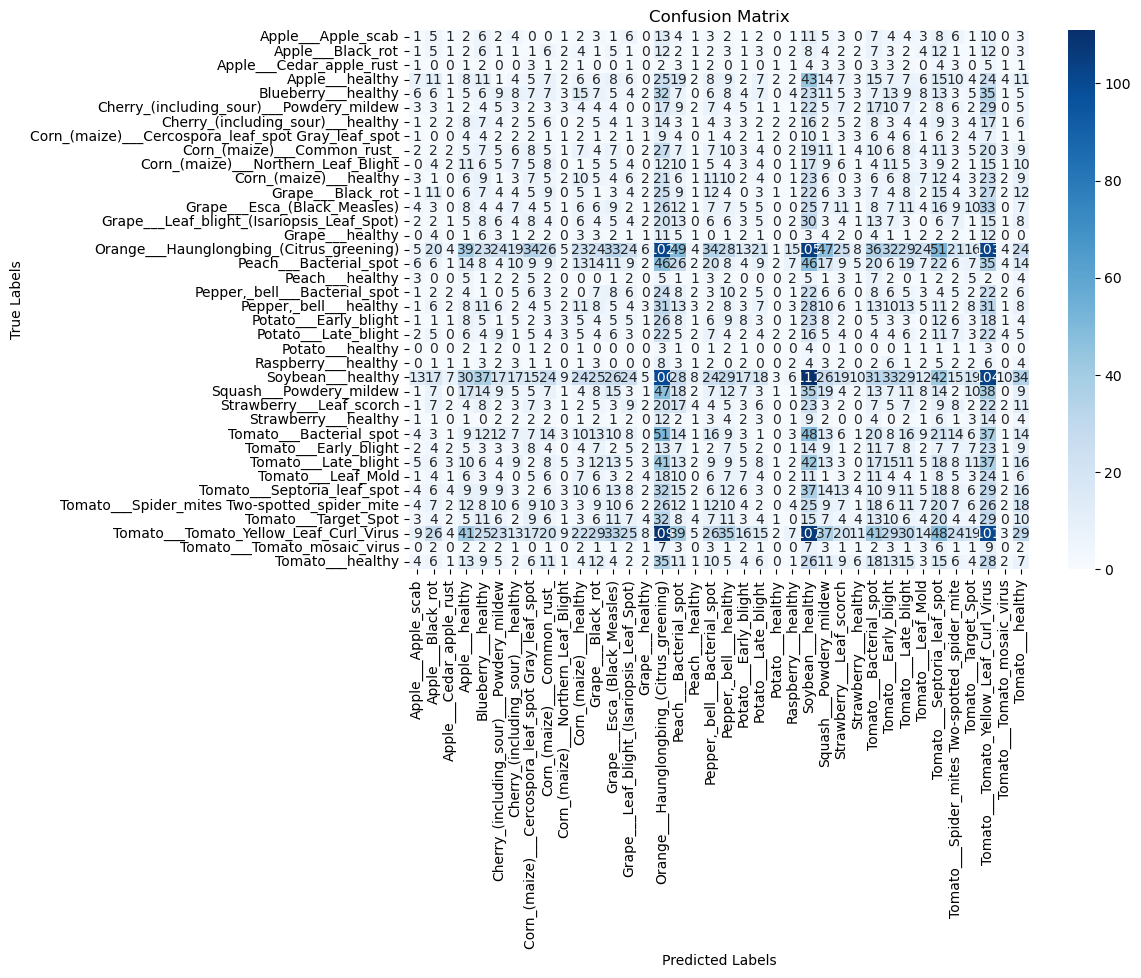

In [29]:
#Detailed Classwise performance
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict all validation samples
validation_steps = np.ceil(validation_generator.samples / batch_size)
validation_predictions = model.predict(validation_generator, steps=int(validation_steps))
predicted_labels = np.argmax(validation_predictions, axis=1)
true_labels = validation_generator.classes

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=validation_generator.class_indices.keys(),
            yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**Building a Predictive System**

In [30]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [31]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [32]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [33]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [52]:
# Example Usage
image_path = 'test_images\00e909aa-e3ae-4558-9961-336bb0f35db3___JR_FrgE.S 8593.JPG'

predicted_class_name = predict_image_class(model, image_path, class_indices)
print("Predicted Class Name:", predicted_class_name)

# Output the result
print("Predicted Class Name:", predicted_class_name)

ValueError: embedded null character

**Save the model to Google drive or local**

In [ ]:
##model.save('drive/MyDrive/Youtube/trained_models/plant_disease_prediction_model.h5')

In [40]:
model.save('cnn_plant_disease_model.h5')

In [50]:
import json
json.dump(class_indices, open("class_indices.json", "w"))


In [41]:
from tensorflow.keras.models import load_model

# Load CNN model
cnn_model = load_model('cnn_plant_disease_model.h5')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load your trained model
model = load_model('your_model.h5')

# Setup the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'your_test_folder_path',
    target_size=(224, 224),   # Use the same size as used in training
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Get predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Generate Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


RESNET MODEL IMPLEMENTATION


In [ ]:
# ========== STEP 1: Import Required Modules ==========
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping   
import matplotlib.pyplot as plt
import numpy as np

In [44]:
# ========== STEP 2: Load ResNet50 Base Model (Frozen Layers) ==========
img_shape = (img_size, img_size, 3)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=img_shape)

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

resnet_model = Model(inputs=base_model.input, outputs=predictions)

94765736/94765736 [==============================] - 26s 0us/step


In [45]:
# ========== STEP 3: Compile the Model ==========
resnet_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [46]:
# ========== STEP 4: Callbacks ==========
checkpoint_cb = ModelCheckpoint('resnet50_base_best.h5', save_best_only=True)
earlystop_cb = EarlyStopping(patience=5, restore_best_weights=True)

In [49]:
# ========== STEP 5: Train ResNet50 Base (Feature Extractor Phase) ==========

# Define initial number of epochs
initial_epochs = 30

# Train the model
history_resnet = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=initial_epochs,
    callbacks=[checkpoint_cb, earlystop_cb]
)


Epoch 1/30


ResourceExhaustedError: Graph execution error:

Detected at node 'sequential/conv2d/Relu' defined at (most recent call last):
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\tornado\platform\asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request
      await super().execute_request(stream, ident, parent)
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute
      res = shell.run_cell(
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\IPython\core\interactiveshell.py", line 3077, in run_cell
      result = self._run_cell(
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\IPython\core\interactiveshell.py", line 3132, in _run_cell
      result = runner(coro)
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\IPython\core\interactiveshell.py", line 3336, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\IPython\core\interactiveshell.py", line 3519, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\IPython\core\interactiveshell.py", line 3579, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\asus\AppData\Local\Temp\ipykernel_20424\3266662760.py", line 2, in <module>
      history = model.fit(
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "c:\Users\asus\anaconda3\envs\plant_disease\lib\site-packages\keras\backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: 'sequential/conv2d/Relu'
OOM when allocating tensor with shape[32,32,222,222] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential/conv2d/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_819]